In [1]:
### Reading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
data =pd.read_csv("KDD_DDoS.csv")
data.head()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,29165,29166,29167,29168,29169,29170,29171,29172,29173,29174
duration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
src_bytes,491.00,146.00,0.00,232.00,199.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1032.00,868.00,44.00,0.00,641.00,74.00,39420.00,43.00,336.00
dst_bytes,0.00,0.00,0.00,8153.00,420.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,44.00,0.00,0.00,43.00,7300.00,43.00,285.00
land,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
num_failed_logins,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
logged_in,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
num_compromised,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
data.shape

(29175, 42)

In [4]:
#Different types of attacks in the database
data['xAttack'].value_counts()

0    15601
1    13574
Name: xAttack, dtype: int64

In [5]:
data.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

In [6]:
cor_mat=data.corr()
cor_mat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,xAttack
duration,1.000000,0.010527,0.056350,-0.002846,-0.016088,NaN,0.007086,0.020033,-0.051339,0.178782,...,0.050209,-0.015420,-0.024417,-0.016174,-0.007791,-0.014278,0.021123,0.180361,0.000799,0.042546
src_bytes,0.010527,1.000000,0.118364,-0.001136,-0.006270,NaN,0.003858,-0.001292,0.041638,-0.000676,...,0.020372,0.003532,-0.039187,-0.038512,-0.015598,-0.014159,-0.029452,-0.046264,0.000999,-0.026834
dst_bytes,0.056350,0.118364,1.000000,-0.000878,-0.004963,NaN,0.010582,0.009147,0.041670,0.067586,...,-0.012262,0.004838,-0.016043,-0.012960,-0.018069,-0.015137,-0.023002,-0.007876,-0.006210,-0.040302
land,-0.002846,-0.001136,-0.000878,1.000000,-0.001744,NaN,-0.001514,-0.000375,-0.013922,-0.000408,...,0.035761,0.159328,0.018433,0.018457,-0.007205,-0.006728,-0.008289,-0.013741,0.020498,0.014919
wrong_fragment,-0.016088,-0.006270,-0.004963,-0.001744,1.000000,NaN,-0.008559,-0.002117,-0.078691,-0.002308,...,0.074862,0.033009,-0.055700,-0.062013,0.015256,-0.038030,0.217362,0.080964,-0.050566,0.074619
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,0.007086,0.003858,0.010582,-0.001514,-0.008559,NaN,1.000000,0.014770,0.108446,0.004533,...,-0.024788,-0.011620,-0.051526,-0.052119,-0.027652,-0.026520,-0.040674,-0.050289,-0.035667,-0.039934
num_failed_logins,0.020033,-0.001292,0.009147,-0.000375,-0.002117,NaN,0.014770,1.000000,0.005814,0.012849,...,-0.007024,-0.005278,-0.008475,-0.009232,-0.007001,-0.001868,-0.010060,0.020641,-0.004239,-0.019886
logged_in,-0.051339,0.041638,0.041670,-0.013922,-0.078691,NaN,0.108446,0.005814,1.000000,0.029328,...,-0.142223,0.095680,-0.472379,-0.479641,-0.222452,-0.230917,-0.373956,-0.107343,-0.253873,-0.550208
num_compromised,0.178782,-0.000676,0.067586,-0.000408,-0.002308,NaN,0.004533,0.012849,0.029328,1.000000,...,-0.004070,0.025401,-0.009679,-0.009637,-0.008646,-0.005688,-0.010967,0.035838,-0.008428,-0.018768


Text(0.5, 1, 'Variable Correlations')

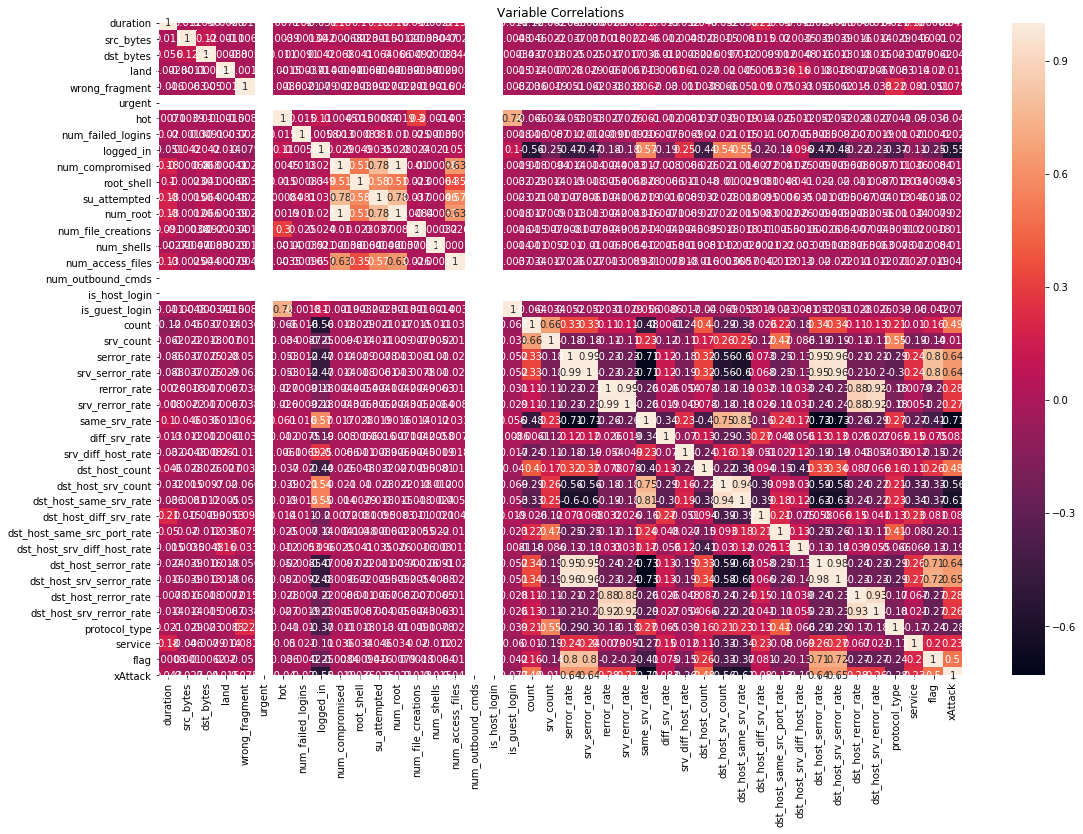

In [7]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 12]
corr_heat = sns.heatmap(cor_mat,annot=True)
plt.title('Variable Correlations')

In [8]:
data.xAttack.unique()

array([0, 1], dtype=int64)

In [9]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,xAttack
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,20,2,0
1,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,3,45,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,50,4,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,25,2,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,25,2,0


In [10]:
sampleset1=data

In [11]:
sampleset2=sampleset1

In [12]:
sampleset2=sampleset2.append(data)

In [13]:
sampleset2.shape

(58350, 42)

In [14]:
sampleset1.shape

(29175, 42)

In [15]:
#Sampling 50% of the data with replacement
#from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = data.sample(frac=0.4, random_state=1)
sampleset1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,xAttack
18586,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,17,4,1
21266,0,327,1041,0,0,0,0,0,1,0,...,0.00,0.00,0.01,0.01,0.0,0.0,1,25,2,0
2990,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,50,4,1
21861,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,31,4,1
11266,0,637,0,0,0,0,0,0,0,0,...,0.42,0.00,0.00,0.00,0.0,0.0,1,20,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,0,223,408,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,1,25,2,0
6324,0,229,1157,0,0,0,0,0,1,0,...,0.25,0.01,0.00,0.00,0.0,0.0,1,25,2,0
7302,0,211,1417,0,0,0,0,0,1,0,...,0.02,0.01,0.00,0.00,0.0,0.0,1,25,2,0
20269,0,0,0,0,0,0,0,0,0,0,...,0.03,0.00,1.00,1.00,0.0,0.0,1,50,4,1


In [16]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset2.values
x=array[:,0:41]
print(x)
y=array[:,41]
print(y)

[[0.000e+00 4.910e+02 0.000e+00 ... 1.000e+00 2.000e+01 2.000e+00]
 [0.000e+00 1.460e+02 0.000e+00 ... 3.000e+00 4.500e+01 2.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 5.000e+01 4.000e+00]
 ...
 [0.000e+00 3.942e+04 7.300e+03 ... 1.000e+00 2.500e+01 5.000e+00]
 [0.000e+00 4.300e+01 4.300e+01 ... 3.000e+00 1.200e+01 2.000e+00]
 [0.000e+00 3.360e+02 2.850e+02 ... 1.000e+00 2.500e+01 2.000e+00]]
[0. 0. 1. ... 1. 0. 0.]


In [17]:
x.shape

(58350, 41)

In [18]:
y.shape

(58350,)

In [19]:
#Cross validation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
features_train.shape

(46680, 41)

In [21]:
labels_test.shape

(11670,)

In [22]:
features_train

array([[0.0000e+00, 1.9800e+02, 1.2884e+04, ..., 1.0000e+00, 2.5000e+01,
        2.0000e+00],
       [0.0000e+00, 2.3400e+02, 6.2820e+03, ..., 1.0000e+00, 2.5000e+01,
        2.0000e+00],
       [0.0000e+00, 2.0700e+02, 1.9250e+03, ..., 1.0000e+00, 2.5000e+01,
        2.0000e+00],
       ...,
       [0.0000e+00, 4.4000e+01, 1.3200e+02, ..., 3.0000e+00, 1.2000e+01,
        2.0000e+00],
       [0.0000e+00, 4.6000e+01, 7.5000e+01, ..., 3.0000e+00, 1.2000e+01,
        2.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.0000e+01,
        1.0000e+00]])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [24]:
labels_test

array([0., 0., 1., ..., 1., 1., 1.])

In [25]:
features_train=features_train.astype(int) 

In [26]:
labels_test=labels_test.astype(int)

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# SVM Algorithm

In [28]:
from sklearn import preprocessing, svm

clf = svm.SVC(kernel='linear')

In [29]:



clf.fit(features_train, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(features_test)

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 7
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
model = clf
results = cross_val_score(model, features_test , labels_test, cv=kfold)
print(results)
#print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)
#print("Accuracy:") % (results.mean()*100.0, results.std()*100.0)
rs1=results.mean()*100.0
print("The results mean of cross_val_score is",rs1)
rs2= results.std()*100.0
print("The results std of cross_val_score is",rs2)

[0.96822542 0.96340732 0.9640072  0.97360528 0.96640672 0.97060588
 0.96460708]
The results mean of cross_val_score is 96.7266413109978
The results std of cross_val_score is 0.34965119348763374


In [32]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,labels_test)
#accu.append(acc*100)
print("Accuracy  : ",acc*100," %")
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(labels_test, y_pred)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(labels_test,y_pred)
print("Presicion :",(precision[1]*100),"%")
print("Recall    :",(recall[1]*100),"%")
print("F-Score   :",(fscore[1]*100),"%")
print("Support   :",support[1])
#scores.append(acc*100)

Accuracy  :  95.45844044558697  %
Presicion : 97.22006220839813 %
Recall    : 92.81737193763921 %
F-Score   : 94.96771743258641 %
Support   : 5388


In [33]:
print(cm)

[[[5001  387]
  [ 143 6139]]

 [[6139  143]
  [ 387 5001]]]
